In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_parquet('../../data_parquet/train_data.parquet')
df_copy = df.copy()

**Procesamos las columnas con mayor significancia (visto en baseline)**

In [3]:
df_copy = df_copy[['generation_hydro_pumped_storage_consumption','generation_solar',
                   'generation_fossil_gas','generation_wind_onshore',
                   'generation_fossil_oil','generation_hydro_water_reservoir',
                   'generation_hydro_run_of_river_and_poundage','generation_nuclear',
                   'generation_fossil_hard_coal','price_actual','generation_waste',
                   'generation_fossil_brown_coal_lignite','generation_biomass',
                   'generation_other','generation_other_renewable', 'total_load_actual']]

In [4]:
# generation_hydro_pumped_storage_consumption, estratificar en dos categorias 0 y 1.
def stratify_generation_hydro_pumped_storage_consumption(df_copy):
    """ Si los valores de la variable son mayores que 0, el valor se modifica a 1.
        En caso contrario, se mantienen en 0.
    Args:
        df_copy (Dataframe): copia de dataframe sin modificar valores

    Returns:
        Dataframe: dataframe modificado
    """
    df_copy['generation_hydro_pumped_storage_consumption']=df_copy['generation_hydro_pumped_storage_consumption'].apply(lambda x: 1 if x > 0 else 0)
    return df_copy

In [5]:
df_copy=stratify_generation_hydro_pumped_storage_consumption(df_copy)

In [6]:
# Funcion que replica el valor de 1 en la variables asignadas,
# Con el objetivo de equilibrar las categorías
def apply_smote(df_copy, target_column, random_state=42, k_neighbors=5):
    X = df_copy.drop(target_column, axis=1)
    y = df_copy[target_column]

    smote = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
    X_res, y_res = smote.fit_resample(X, y)

    df_res = pd.DataFrame(X_res, columns=X.columns)
    df_res[target_column] = y_res

    return df_res

In [7]:
df_copy = apply_smote(df_copy, 'generation_hydro_pumped_storage_consumption')

In [8]:
# generation_solar, estratificar en dos categorias 0 y 1.
def stratify_generation_solar(df_copy):
    """ Si los valores de la variable son menores que 600, el valor se modifica a 0.
        En caso contrario, se mantienen en 1.
    Args:
        df_copy (Dataframe): copia de dataframe sin modificar valores

    Returns:
        Dataframe: dataframe modificado
    """
    df_copy['generation_solar']=df_copy['generation_solar'].apply(lambda x: 0 if x < 600 else 1)
    return df_copy

In [9]:
df_copy = stratify_generation_solar(df_copy)

In [10]:
# generation_fossil_gas, eliminar valores atípicos
def outliers_generation_fossil_gas(df_copy):
    # Deteccion de atípicos 
    q1 = df_copy['generation_fossil_gas'].quantile(0.25)
    q3 = df_copy['generation_fossil_gas'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['generation_fossil_gas']))
    
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['generation_fossil_gas'] >= Lower_tail)&(df_copy['generation_fossil_gas'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))
    return filtered_df

In [11]:
df_copy=outliers_generation_fossil_gas(df_copy)

Antes de eliminar atípicos: 205304
Despues de eliminar atípicos: 195300


In [12]:
# generation_wind_onshore, transformación logarítmica
def logarithm_generation_wind_onshore(df_copy):
    array1d = df_copy['generation_wind_onshore'].values
    array2d = array1d.reshape(-1,1)
    df_copy['generation_wind_onshore'] = power_transform(array2d, method='yeo-johnson', standardize=False)
    return df_copy

In [13]:
df_copy=logarithm_generation_wind_onshore(df_copy)

In [14]:
# generation_fossil_oil, eliminar valores atípicos
def outliers_generation_fossil_oil(df_copy):
    # Deteccion de atípicos 
    q1 = df_copy['generation_fossil_oil'].quantile(0.25)
    q3 = df_copy['generation_fossil_oil'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['generation_fossil_oil']))
    
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['generation_fossil_oil'] >= Lower_tail)&(df_copy['generation_fossil_oil'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))
    return filtered_df

In [15]:
df_copy=outliers_generation_fossil_oil(df_copy)

Antes de eliminar atípicos: 195300
Despues de eliminar atípicos: 193367


In [16]:
# generation_hydro_water_reservoir, transformación logarítmica
def logarithm_generation_hydro_water_reservoirl(df_copy):
    array1d = df_copy['generation_hydro_water_reservoir'].values
    array2d = array1d.reshape(-1,1)
    df_copy['generation_hydro_water_reservoir'] = power_transform(array2d, method='box-cox', standardize=False)
    return df_copy

In [17]:
df_copy = logarithm_generation_hydro_water_reservoirl(df_copy)

In [18]:
# generation_hydro_water_reservoir, transformación logarítmica
def logarithm_generation_hydro_run_of_river_and_poundage(df_copy):
    array1d = df_copy['generation_hydro_run_of_river_and_poundage'].values
    array2d = array1d.reshape(-1,1)
    df_copy['generation_hydro_run_of_river_and_poundage'] = power_transform(array2d, method='yeo-johnson', standardize=False)
    return df_copy

In [19]:
df_copy = logarithm_generation_hydro_run_of_river_and_poundage(df_copy)

In [20]:
# generation_hydro_run_of_river_and_poundage, eliminar valores atípicos
def outliers_generation_hydro_run_of_river_and_poundage(df_copy):
    # Deteccion de atípicos 
    q1 = df_copy['generation_hydro_run_of_river_and_poundage'].quantile(0.25)
    q3 = df_copy['generation_hydro_run_of_river_and_poundage'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['generation_hydro_run_of_river_and_poundage']))
    
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['generation_hydro_run_of_river_and_poundage'] >= Lower_tail)&(df_copy['generation_hydro_run_of_river_and_poundage'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))
    return filtered_df

In [21]:
df_copy = outliers_generation_hydro_run_of_river_and_poundage(df_copy)

Antes de eliminar atípicos: 193367
Despues de eliminar atípicos: 193363


In [22]:
# Estratificamos variable generation_nuclear
def stratify_generation_nuclear(df_copy):
    bins = [0,6000,7000, float('inf')]
    labels = [0,1,2]
    df_copy['generation_nuclear'] = pd.cut(x=df_copy['generation_nuclear'].values,bins=bins, labels=labels)
    return df_copy

In [23]:
df_copy = stratify_generation_nuclear(df_copy)

In [26]:
# Clase perteneciente a generation_fossil_hard_coal, kmeans y transformacion por distancias al centroide
class distance_transform_generation_fossil_hard_coal:
    def __init__(self, df_copy):
        self.df_copy = df_copy
    
    def scaler(self):
        scaler = StandardScaler()
        df_copy['generation_fossil_hard_coal']=scaler.fit_transform(self.df_copy[['generation_fossil_hard_coal']])
        return self.df_copy

    def kmeans_transform(self):
        self.scaler() # Escalamos en funcion
        # Clustering
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(self.df_copy[['generation_fossil_hard_coal']])

        # Extraemos distancias
        distances = kmeans.transform(self.df_copy[['generation_fossil_hard_coal']])

        # Añadimos a la columna los nuevos valores
        self.df_copy['generation_fossil_hard_coal'] = distances
        
        return self.df_copy

In [27]:
distance_transform = distance_transform_generation_fossil_hard_coal(df_copy)
df_copy = distance_transform.kmeans_transform()

In [29]:
# price_actual, eliminar valores atípicos
def outliers_price_actual(df_copy):
    # Deteccion de atípicos 
    q1 = df_copy['price_actual'].quantile(0.25)
    q3 = df_copy['price_actual'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['price_actual']))
    
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['price_actual'] >= Lower_tail)&(df_copy['price_actual'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))
    return filtered_df

In [30]:
df_copy=outliers_price_actual(df_copy)

Antes de eliminar atípicos: 193363
Despues de eliminar atípicos: 189524


In [34]:
# generation_waste, transformación logarítmica
def logarithm_generation_waste(df_copy):
    array1d = df_copy['generation_waste'].values
    array2d = array1d.reshape(-1,1)
    df_copy['generation_waste'] = power_transform(array2d, method='yeo-johnson', standardize=False)
    return df_copy

In [35]:
df_copy = logarithm_generation_waste(df_copy)

C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\2642901404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['generation_waste'] = power_transform(array2d, method='yeo-johnson', standardize=False)


In [37]:
# generation_fossil_brown_coal_lignite, estratificar en dos categorias 0 y 1.
def stratify_generation_fossil_brown_coal_lignite(df_copy):
    """ Si los valores de la variable son mayores que 200, el valor se modifica a 1.
        En caso contrario, se mantienen en 0.
    Args:
        df_copy (Dataframe): copia de dataframe sin modificar valores

    Returns:
        Dataframe: dataframe modificado
    """
    df_copy['generation_fossil_brown_coal_lignite']=df_copy['generation_fossil_brown_coal_lignite'].apply(lambda x: 1 if x >= 200 else 0)
    return df_copy

In [38]:
df_copy = stratify_generation_fossil_brown_coal_lignite(df_copy)

C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\2796250732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['generation_fossil_brown_coal_lignite']=df_copy['generation_fossil_brown_coal_lignite'].apply(lambda x: 1 if x >= 200 else 0)


In [40]:
df_copy = apply_smote(df_copy, 'generation_fossil_brown_coal_lignite')

In [44]:
# Funcion que extrae los grupos de generation_biomass
def transform_generation_biomass_gmm(filtered_df):
    data = filtered_df['generation_biomass'].values
    data = data.reshape(-1,1)

    # entrenar
    gmm = GaussianMixture(n_components=3, n_init=10)
    gmm.fit(data)

    # predecir probabilidades
    values = gmm.predict_proba(data).round(3)
    values = np.argmax(values, axis=1)

    filtered_df['generation_biomass'] = values
    return filtered_df

In [45]:
# Funcion que elimina atípicos de generation_biomass
def transform_generation_biomass_out(df_copy):
    q1 = df_copy['generation_biomass'].quantile(0.25)
    q3 = df_copy['generation_biomass'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['generation_biomass']))
        
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['generation_biomass'] >= Lower_tail)&(df_copy['generation_biomass'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))

    return transform_generation_biomass_gmm(filtered_df)

In [48]:
df_copy=transform_generation_biomass_out(df_copy)

Antes de eliminar atípicos: 263812
Despues de eliminar atípicos: 263750


C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\2635199354.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['generation_biomass'] = values


In [50]:
def gmm_generation_other(df_copy):
    """Convertir valores de variable a cluster según multiples modos, mediante gaussian mixture.

    Args:
        df_copy (DataFrame): dataframe si modificar

    Returns:
        DataFrame: dataframe con valores modificado
    """
    # extraer columna
    data = df_copy['generation_other'].values
    data = data.reshape(-1,1)

    # entrenar
    gmm = GaussianMixture(n_components=3, n_init=10)
    gmm.fit(data)

    # predecir probabilidades
    values = gmm.predict_proba(data).round(3)
    values = np.argmax(values, axis=1)

    df_copy['generation_other'] = values
    return df_copy

In [51]:
df_copy =  gmm_generation_other(df_copy)

C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\1312073854.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['generation_other'] = values


In [53]:
def gmm_generation_other_renewable(df_copy):
    """Convertir valores de variable a cluster según multiples modos, mediante gaussian mixture.

    Args:
        df_copy (DataFrame): dataframe si modificar

    Returns:
        DataFrame: dataframe con valores modificado
    """
    # extraer columna
    data = df_copy['generation_other_renewable'].values
    data = data.reshape(-1,1)

    # entrenar
    gmm = GaussianMixture(n_components=2, n_init=10)
    gmm.fit(data)

    # predecir probabilidades
    values = gmm.predict_proba(data).round(3)
    values = np.argmax(values, axis=1)

    df_copy['generation_other_renewable'] = values
    return df_copy

In [54]:
df_copy =  gmm_generation_other_renewable(df_copy)

C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\2981806644.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['generation_other_renewable'] = values


In [73]:
# Funcion que elimina atípicos de total_load_actual
def transform_total_load_actual(df_copy):
    q1 = df_copy['total_load_actual'].quantile(0.25)
    q3 = df_copy['total_load_actual'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    print('Antes de eliminar atípicos:',len(df_copy['total_load_actual']))
        
    # Filtramos en pandas extrayendo los valores entre los quantiles
    filtered_df = df_copy[(df_copy['total_load_actual'] >= Lower_tail)&(df_copy['total_load_actual'] <= Upper_tail)]

    print('Despues de eliminar atípicos:',len(filtered_df))

    return transform_generation_biomass_gmm(filtered_df)

In [74]:
df_copy = transform_total_load_actual(df_copy)

Antes de eliminar atípicos: 263750
Despues de eliminar atípicos: 263633


C:\Users\jarod\AppData\Local\Temp\ipykernel_9120\2635199354.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['generation_biomass'] = values


In [ ]:
df_copy = df_copy[['generation_hydro_pumped_storage_consumption','generation_solar',
                   'generation_fossil_gas','generation_wind_onshore',
                   'generation_fossil_oil','generation_hydro_water_reservoir',
                   'generation_hydro_run_of_river_and_poundage','generation_nuclear',
                   'generation_fossil_hard_coal','price_actual','generation_waste',
                   'generation_fossil_brown_coal_lignite','generation_biomass',
                   'generation_other','generation_other_renewable', 'total_load_actual']]

<Axes: xlabel='total_load_actual', ylabel='Count'>

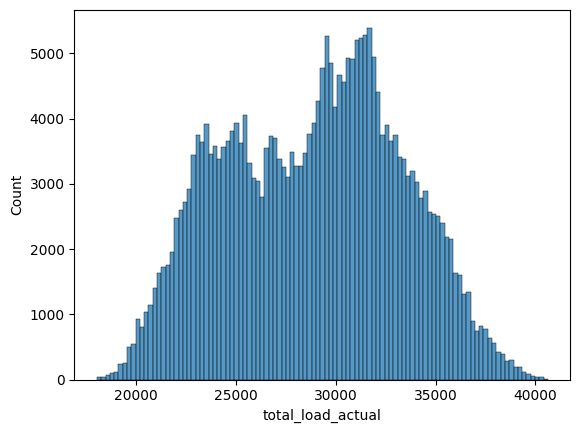

In [75]:
sns.histplot(df_copy, x='total_load_actual')